Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia de Computação - Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [5]:
#abrir a imagem
img = cv2.imread('data/t1.jpg',1)

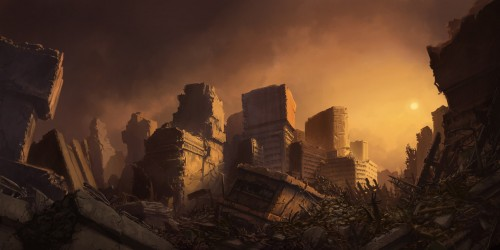

In [110]:
#mostrando a imagem colorida
cv2_imshow(img)

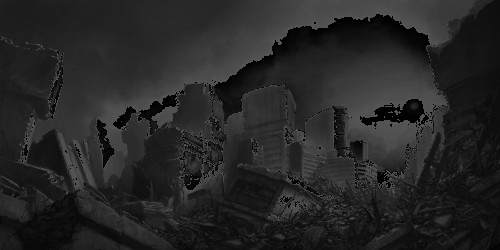

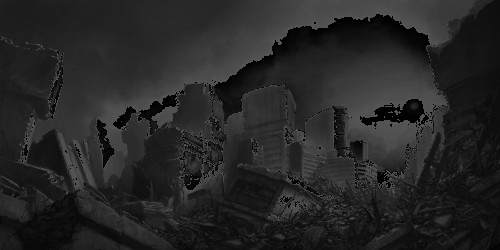

In [109]:
#aplicando conversão básica
#numpy

img_grayscale_basic_np = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3
#soma as 3 bandas e divide por 3

#cv2
B, G, R = (img[ : , : ,0], img[ : , : ,1], img[ : , : ,2])
img_grayscale_basic_cv2 = (B + G + R)/3 #soma as 3 bandas e divide por 3

cv2_imshow(img_grayscale_basic_np)
cv2_imshow(img_grayscale_basic_cv2)

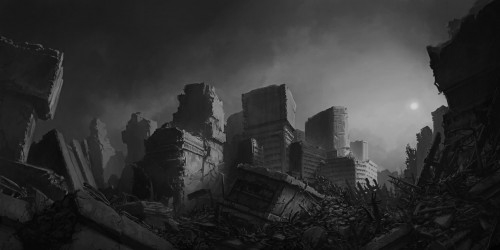

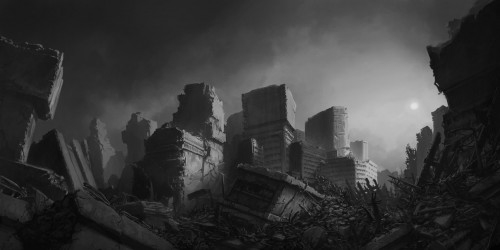

In [108]:
#aplicando conversão ponderada
img_grayscale_pondered_np = (0.21 * img[ : , : ,0]) + (0.72 * img[ : , : ,1]) + (0.07 * img[ : , : ,2])
# usa valores ponderados para destacar as cores mais visiveis pelo olho humano
# verde em 72%, vermelho em 21% e azul em 7%

#cv2
B, G, R = img[ : , : ,0], img[ : , : ,1], img[ : , : ,2]
img_grayscale_pondered_cv2 = 0.21 * R + 0.72 * G + 0.07 * B

cv2_imshow(img_grayscale_pondered_np)
cv2_imshow(img_grayscale_pondered_cv2)

## Histograma de uma imagem

Fazer o histograma de uma imagem

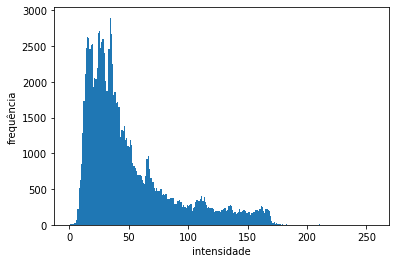

In [107]:
# Histograma é um gráfico ou plot que está relacionado à frequência de pixels em uma imagem em escala de cinza
# com valores de pixel (variando de 0 a 255).
plt.hist(img_grayscale_pondered_np.ravel(), 256, [0,256], histtype="bar")
plt.xlabel('intensidade')
plt.ylabel('frequência')
plt.show()

Agora faça o histograma normalizado

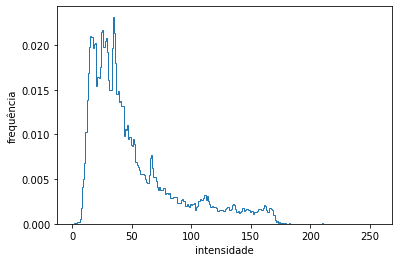

In [106]:
plt.hist(img_grayscale_pondered_np.ravel(), 256, [0,256], density=True, histtype="step")
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

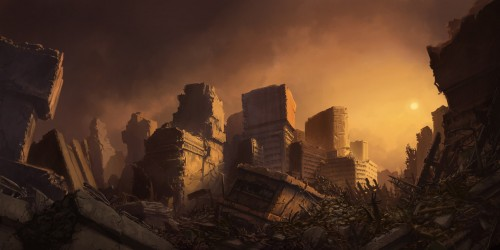

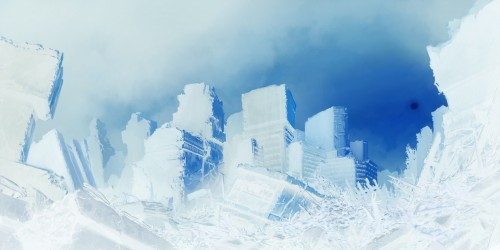

In [105]:
#negativo
img_in = cv2.imread('data/t1.jpg',1)

img_negative_np = 255 - img_in
# a transformação negativa é feita pelo cálculo s = L-1-r, com L valendo 256
# logo 255 menos o valor de cada pixel da imagem

cv2_imshow(img_in)
cv2_imshow(img_negative_np)

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


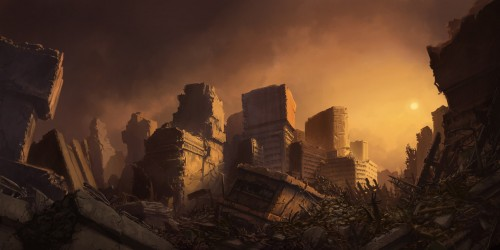

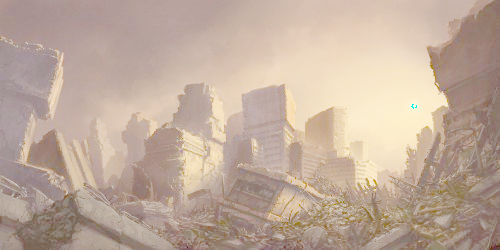

In [104]:
#logaritimica 
img_in = cv2.imread('data/t1.jpg',1)

# As tranformações de log são representadas pela expessão s = c*log(1+r)
# c é calculado por 255/log(1+m), onde m é o valor máximo de um pixel da imagem
c = 255/(np.log(1 + np.max(img_in)))
log_transformed = c * np.log(1 + img_in)

cv2_imshow(img_in)
cv2_imshow(log_transformed)

Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

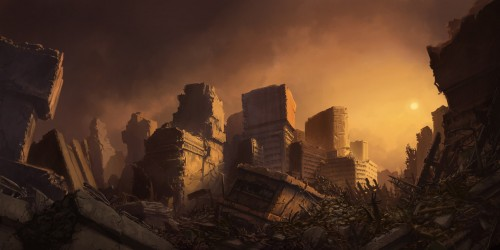

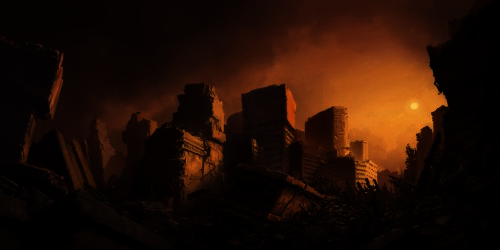

In [103]:
#gamma 
img_in = cv2.imread('data/t1.jpg',1)

gamma = np.array(255*(img / 255) ** 2.2, dtype = 'uint8')
# As transfomrações gamma podem ser expressas por s = c*r^γ
# importante para exibir imagens em uma tela corretamente, envitando branqueamento ou escurecimento

cv2_imshow(img_in)
cv2_imshow(gamma)

Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

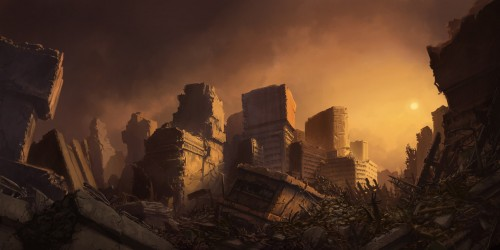

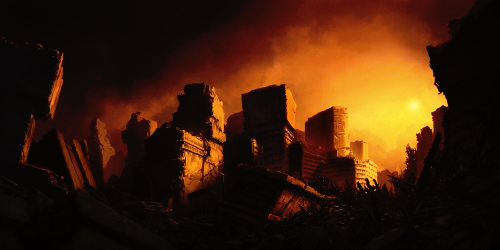

In [102]:
#alargamento de contraste
img_in = cv2.imread('data/t1.jpg',1)

# cv2.LUT para alongamento de contraste criando uma tabela personalizada usando np.inpert
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img_out = cv2.LUT(img_in, table)

cv2_imshow(img_in)
cv2_imshow(img_out)

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

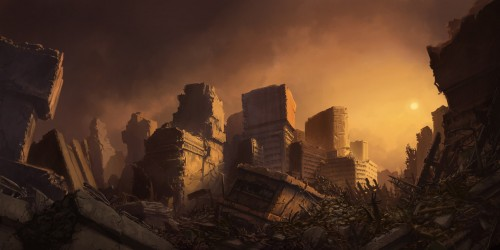

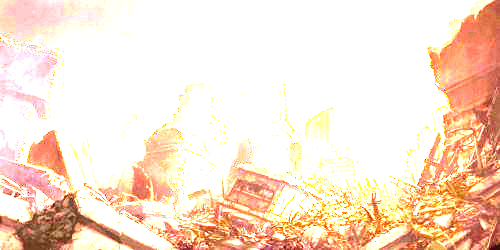

In [101]:
#contraste e brilho
img_in = cv2.imread('data/t1.jpg',1)
a = 10
b = -25

# Utiliza a função convertScaleAbs para fazer o contraste e o brilho da imagem
# a partir do alpha e beta informados
img_out = cv2.convertScaleAbs(img_in, alpha=a, beta=b)

cv2_imshow(img_in)
cv2_imshow(img_out)

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

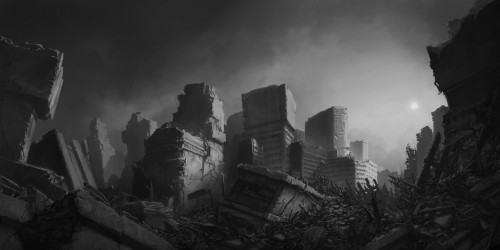

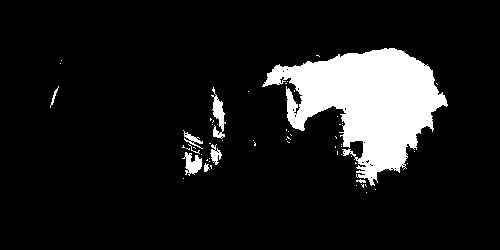

In [100]:
#limiar
img_in = cv2.imread('data/t1.jpg',0)

# No limiar, cada valor de pixel é comparado com o valor do limiar.
# Se o valor do pixel for menor que o limite, ele será definido como 0, caso contrário, 
# será definido como um valor máximo (geralmente 255).
# A função cv2.threshold é usada para limiar.
ret, img_out = cv2.threshold(img_in, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(img_in)
cv2_imshow(img_out)

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

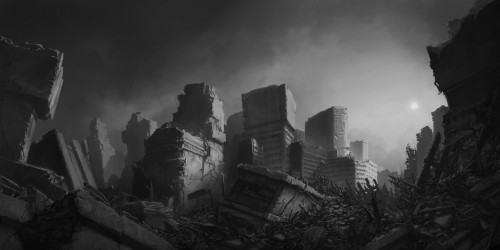

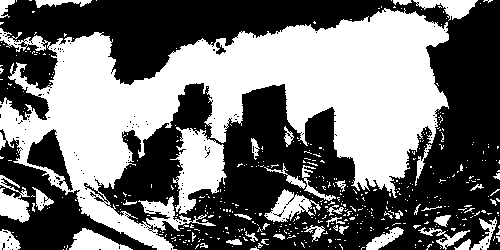

In [99]:
#limiar (com fatiamento por plano)
img_in = cv2.imread('data/t1.jpg',0)

a = 199
b = 5

# Utiliza-se a função de limiar adaptativo, passando os valores de alpha e beta informados
img_out = cv2.adaptiveThreshold(img_in, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, a, b)

cv2_imshow(img_in)
cv2_imshow(img_out)